In [4]:
%pylab inline
import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'rm'

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import pandas as pd
import h5py, itertools, scipy.stats
import matplotlib.pyplot as plt
import sys, os, re
from scipy.special import erf
from scipy.optimize import curve_fit
from andrew_tools.simple_tools import high_low_limit
import Claires_modules

def normal_cdf(x,sigma,mu):
    return 0.5*(1.0+erf((x-mu)/(sigma*np.sqrt(2.0))))

h1107
58346.91156865649
10005925.048141016
250.1792327062657


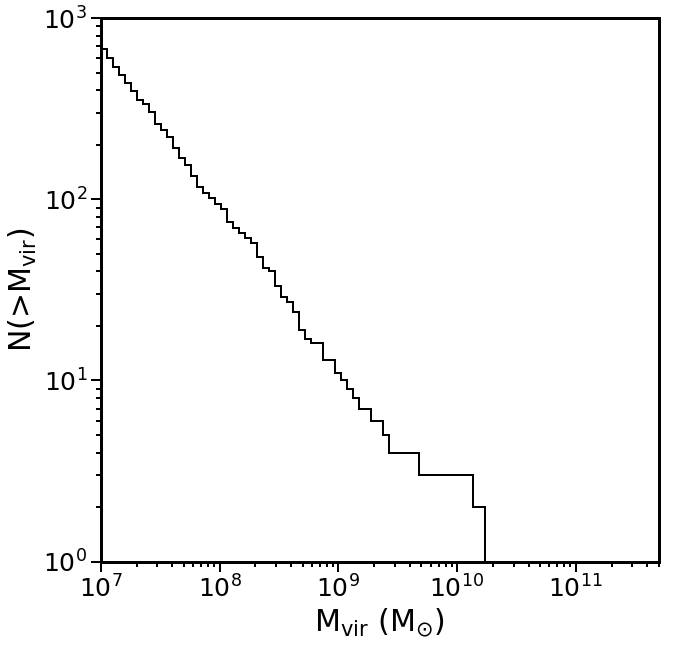

h1245
58346.91156865649
10005925.048141016
236.2761072433713


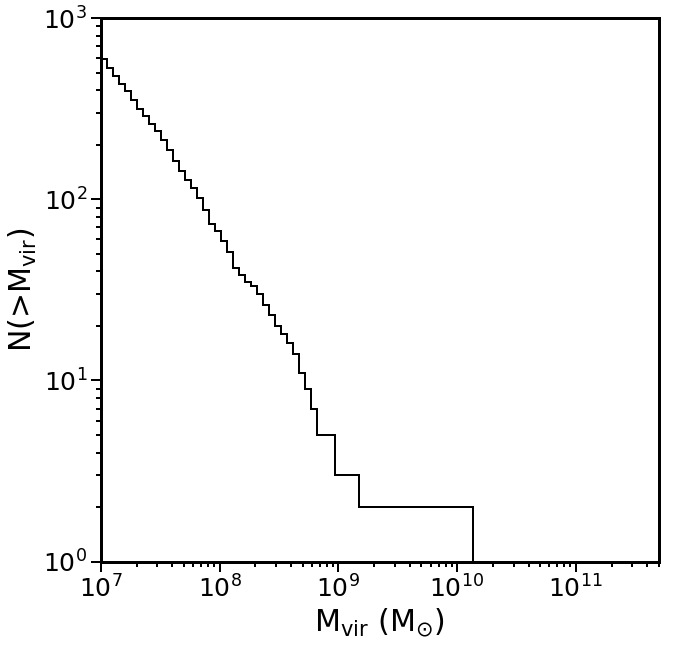

h1386
58346.91156865649
10005925.048141016
228.8905347355947


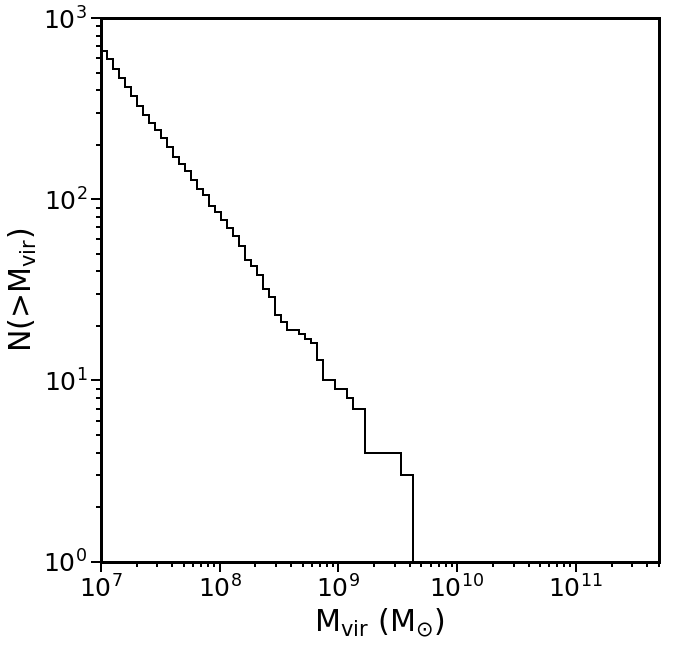

h493
58346.91156865649
10005925.048141016
329.7126351651607


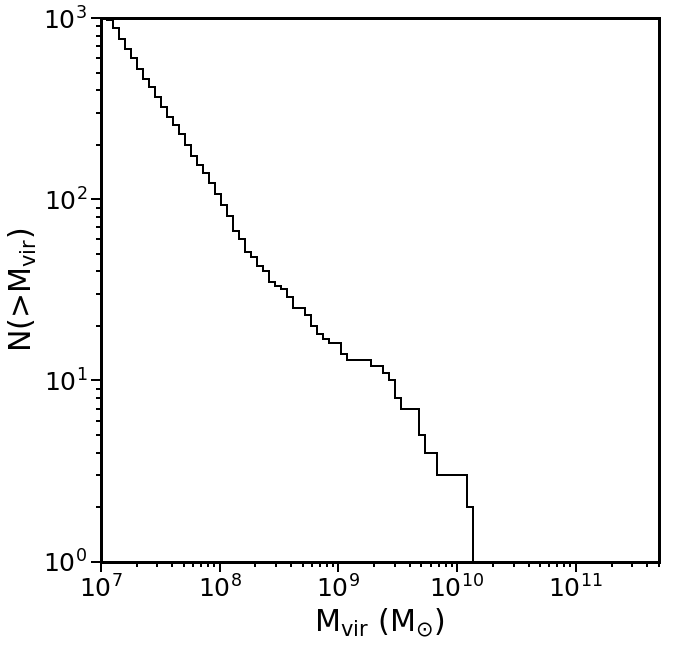

h539
58346.91156865649
10005925.048141016
317.335209598578


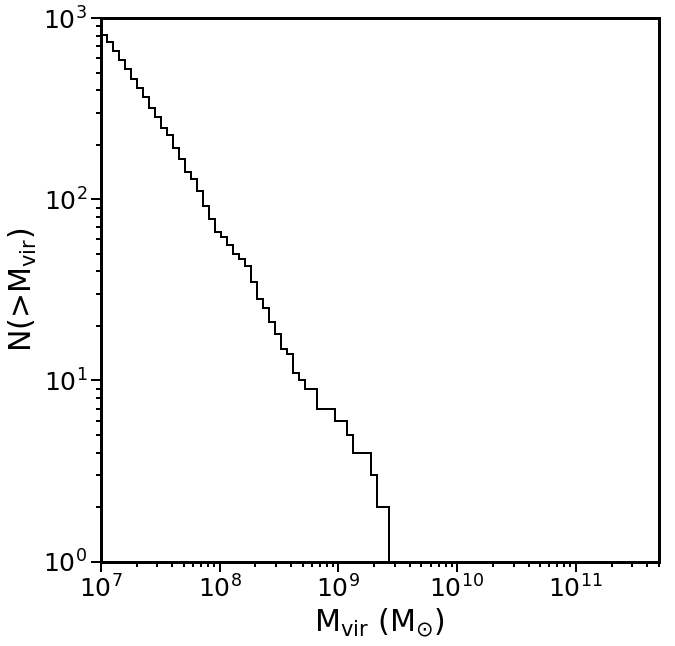

h609
58346.91156865649
10005925.048141016
306.53829062361126


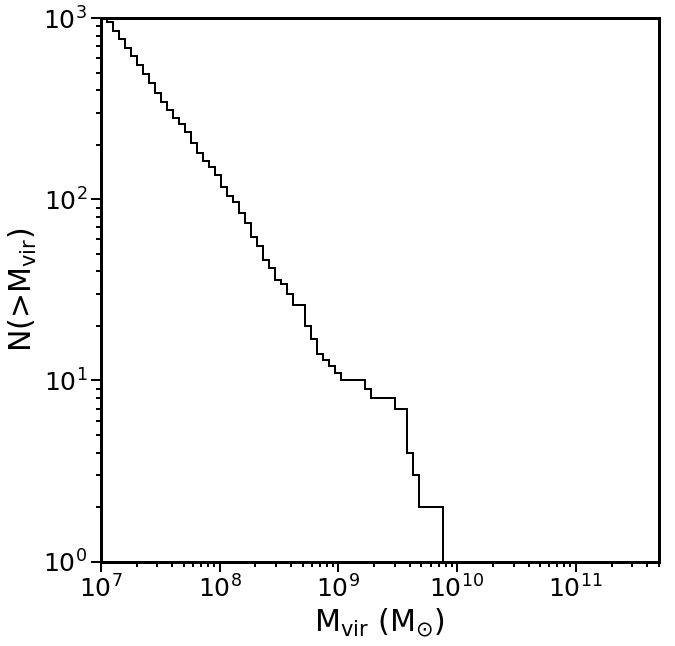

h694
58346.91156865649
10005925.048141016
291.8145459931862


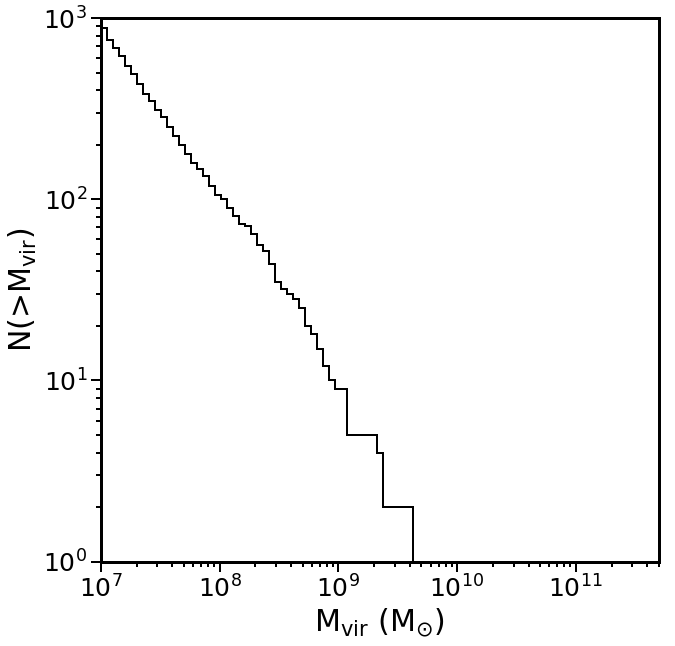

h795
58346.91156865649
10005925.048141016
278.0462153754999


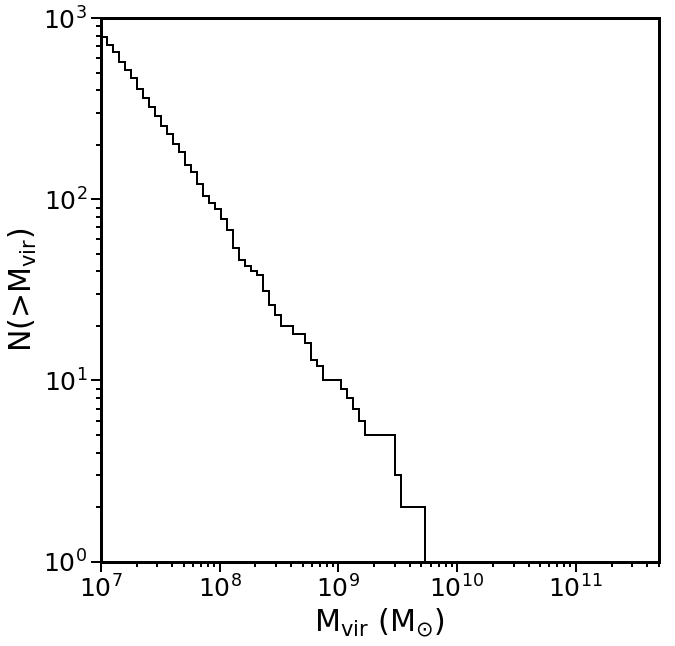

h833
58346.91156865649
10005925.048141016
270.86653829062357


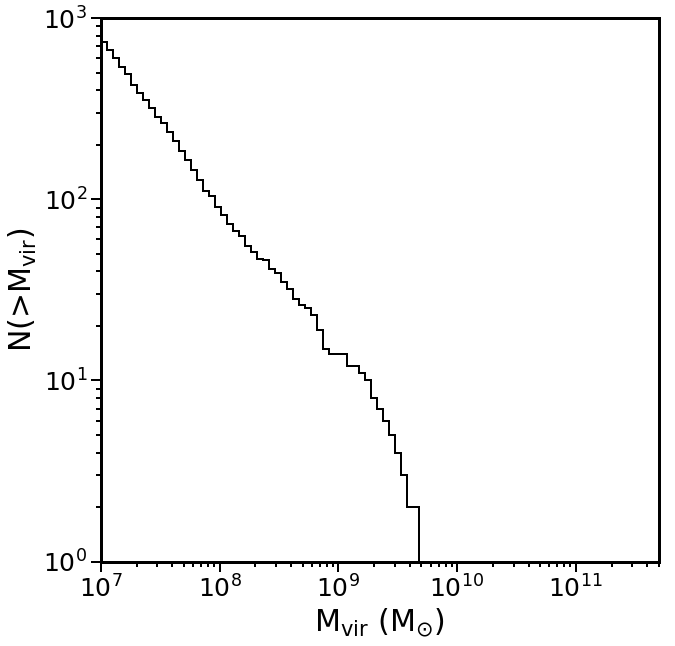

h848
58346.91156865649
10005925.048141016
271.3420234039401


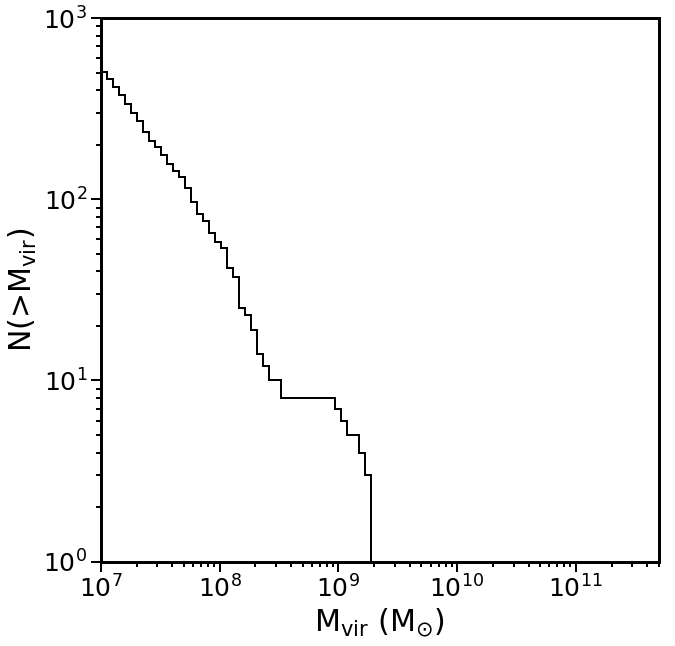

h879
58346.91156865649
10005925.048141016
265.48659457858093


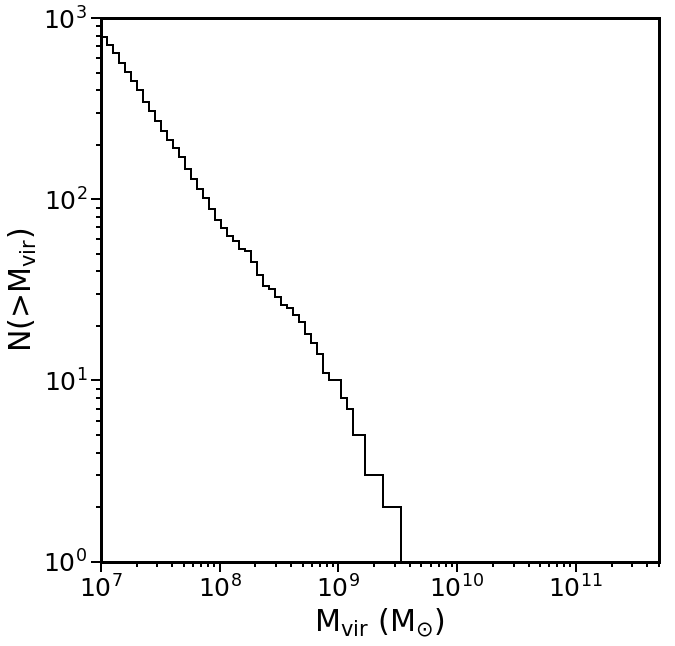

h988
58346.91156865649
10005925.048141016
259.0505110354021


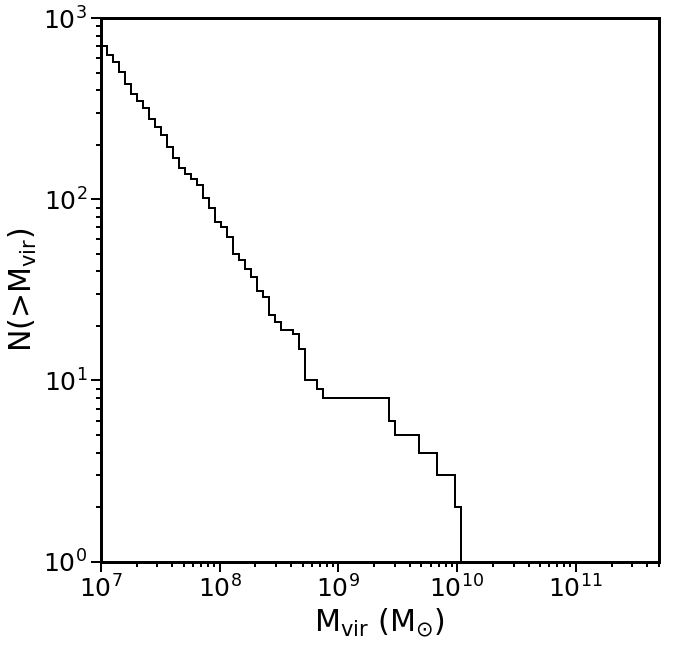

In [16]:
#Subhalo mass functions 

h = 0.6751

total_len = 0
total_hist = None

disk_total_len = 0
disk_total_hist = None

radius_bins = np.linspace(0.0,100.0,50)

fig1 = plt.figure(1,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
#plt.xlim([10.0,4.0])
plt.xscale('log')
plt.yscale('log')

for data_file in os.listdir('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'):
    
    fig1 = plt.figure(1,(10,10))
    rc('axes',linewidth=3)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.tick_params(which='minor',width=2,length=5)
    plt.tick_params(which='major',width=2,length=10)
    #plt.xlim([10.0,4.0])
    plt.xscale('log')
    plt.yscale('log')
    
    h_number = data_file.split('_')[2]
    print h_number
    f_halos = np.loadtxt('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'+data_file)
    Data_Vmax = f_halos[:,3]
    Data_X = f_halos[:,0]*1000.0/h
    Data_Y = f_halos[:,1]*1000.0/h
    Data_Z = f_halos[:,2]*1000.0/h
    Data_Rvir = f_halos[:,5]/h
    Data_M = f_halos[:,4]/h
    Data_Vpeak = f_halos[:,6]
    
    print np.min(Data_M)
    
    mass_mask = (Data_M>1.0e7)
    Data_X_cut = Data_X[mass_mask]
    Data_Y_cut = Data_Y[mass_mask]
    Data_Z_cut = Data_Z[mass_mask]
    Data_M_cut = Data_M[mass_mask]
    Data_Rvir_cut = Data_Rvir[mass_mask]
    
    print np.min(Data_M_cut)
    
    host_index = np.argmax(Data_M_cut)
    R_vir_host = Data_Rvir_cut[host_index]
    print R_vir_host
    cen_host = [Data_X_cut[host_index],Data_Y_cut[host_index],Data_Z_cut[host_index]]
    
    dist = np.sqrt((Data_X_cut-cen_host[0])**2.0+(Data_Y_cut-cen_host[1])**2.0+(Data_Z_cut-cen_host[2])**2.0)

    dist_cut = (dist<250.0)&(dist>0.0)
    subhalo_masses = Data_M_cut[dist_cut]
    plt.hist(subhalo_masses,bins=np.logspace(7.0,12.0,100),cumulative=-1,color='k',histtype='step',linewidth=2)

    plt.xlabel('$M_{vir}$ ($M_{\odot}$)',fontsize=30)
    plt.ylabel('N(>$M_{vir}$)',fontsize=30)
    plt.xlim([1.0e7,5.0e11])
    plt.ylim([1.0,1.0e3])
    plt.show()

h1107
250.1792327062657
(49,)
h1245
236.2761072433713
(2, 49)
h1386
228.8905347355947
(3, 49)
h493
329.7126351651607
(4, 49)
h539
317.335209598578
(5, 49)
h609
306.53829062361126
(6, 49)
h694
291.8145459931862
(7, 49)
h795
278.0462153754999
(8, 49)
h833
270.86653829062357
(9, 49)
h848
271.3420234039401
(10, 49)
h879
265.48659457858093
(11, 49)
h988
259.0505110354021
(12, 49)


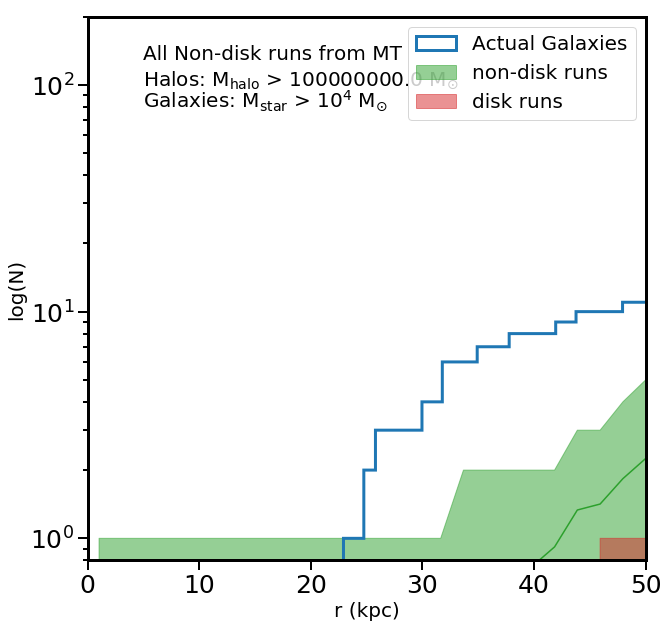

In [21]:
#Cut on Mass

h = 0.6751

total_len = 0
total_hist = None

disk_total_len = 0
disk_total_hist = None

radius_bins = np.linspace(0.0,100.0,50)

for data_file in os.listdir('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'):
    h_number = data_file.split('_')[2]
    print h_number
    f_halos = np.loadtxt('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'+data_file)
    Data_Vmax = f_halos[:,3]
    Data_X = f_halos[:,0]*1000.0/h
    Data_Y = f_halos[:,1]*1000.0/h
    Data_Z = f_halos[:,2]*1000.0/h
    Data_Rvir = f_halos[:,5]/h
    Data_M = f_halos[:,4]/h
    Data_Vpeak = f_halos[:,6]
    
    M_t = 1.0e8
    
    Vmax_mask = (Data_M>1.0e8)
    
    Data_X_cut = Data_X[Vmax_mask]
    Data_Y_cut = Data_Y[Vmax_mask]
    Data_Z_cut = Data_Z[Vmax_mask]
    Data_M_cut = Data_M[Vmax_mask]
    Data_Rvir_cut = Data_Rvir[Vmax_mask]
    
    host_index = np.argmax(Data_M_cut)
    R_vir_host = Data_Rvir_cut[host_index]
    print R_vir_host
    cen_host = [Data_X_cut[host_index],Data_Y_cut[host_index],Data_Z_cut[host_index]]
    
    dist = np.sqrt((Data_X_cut-cen_host[0])**2.0+(Data_Y_cut-cen_host[1])**2.0+(Data_Z_cut-cen_host[2])**2.0)
    
    hist_matrix_diff, bins = np.histogram(dist[(dist!=0.0)],bins=radius_bins)
    hist_matrix = np.cumsum(hist_matrix_diff)
    
    #print hist_matrix, radius_bins
    
    #print total_hist.shape
    if hasattr(total_hist, '__len__'):
        total_hist = np.vstack((total_hist,hist_matrix))
    else:
        total_hist = hist_matrix
    print total_hist.shape
    
    #if total_hist == None:
    #    total_hist = hist_matrix
    #else:
    #    total_hist = np.concatenate((total_hist,hist_matrix),axis=0)
    
    total_len += len(hist_matrix)

plot_bins = [(radius_bins[ii]+radius_bins[ii+1])/2.0 for ii in range(len(radius_bins)-1)]

min_line = [np.min(total_hist[:,ii]) for ii in range(len(total_hist[0]))]
max_line = [np.max(total_hist[:,ii]) for ii in range(len(total_hist[0]))]
med_line = [np.mean(total_hist[:,ii]) for ii in range(len(total_hist[0]))]

hl_line = [high_low_limit(total_hist[:,ii],0.68) for ii in range(len(total_hist[0]))]

low_line = [xx[0] for xx in hl_line]
high_line = [xx[1] for xx in hl_line]

plot_top = max_line[-1]

# Now do the same for the disk runs

for data_file in os.listdir('../../initial_test_with_ELVIS/Tyler_disk_data_from_mt/'):
    h_number = data_file.split('_')[2]
    f_halos = np.loadtxt('../../initial_test_with_ELVIS/Tyler_disk_data_from_mt/'+data_file)
    Data_Vmax = f_halos[:,3]
    Data_X = f_halos[:,0]*1000.0/h
    Data_Y = f_halos[:,1]*1000.0/h
    Data_Z = f_halos[:,2]*1000.0/h
    Data_Rvir = f_halos[:,5]/h
    Data_M = f_halos[:,4]/h
    Data_Vpeak = f_halos[:,6]
    
    M_t = 1.0e8
    
    Vmax_mask = (Data_M>1.0e8)
    
    Data_X_cut = Data_X[Vmax_mask]
    Data_Y_cut = Data_Y[Vmax_mask]
    Data_Z_cut = Data_Z[Vmax_mask]
    Data_M_cut = Data_M[Vmax_mask]
    Data_Rvir_cut = Data_Rvir[Vmax_mask]
    
    host_index = np.argmax(Data_M_cut)
    R_vir_host = Data_Rvir_cut[host_index]
    cen_host = [Data_X_cut[host_index],Data_Y_cut[host_index],Data_Z_cut[host_index]]
    
    dist = np.sqrt((Data_X_cut-cen_host[0])**2.0+(Data_Y_cut-cen_host[1])**2.0+(Data_Z_cut-cen_host[2])**2.0)
    
    hist_matrix_diff, bins = np.histogram(dist[(dist!=0.0)],bins=radius_bins)
    hist_matrix = np.cumsum(hist_matrix_diff)
    if hasattr(disk_total_hist, '__len__'):
        disk_total_hist = np.vstack((disk_total_hist,hist_matrix))
    else:
        disk_total_hist = hist_matrix
    
    #if disk_total_hist == None:
    #    disk_total_hist = hist_matrix
    #else:
    #    disk_total_hist = np.concatenate((disk_total_hist,hist_matrix),axis=0)
    
    disk_total_len += len(hist_matrix)

disk_min_line = [np.min(disk_total_hist[:,ii]) for ii in range(len(disk_total_hist[0]))]
disk_max_line = [np.max(disk_total_hist[:,ii]) for ii in range(len(disk_total_hist[0]))]
disk_med_line = [np.mean(disk_total_hist[:,ii]) for ii in range(len(disk_total_hist[0]))]

disk_hl_line = [high_low_limit(disk_total_hist[:,ii],0.68) for ii in range(len(disk_total_hist[0]))]

disk_low_line = [xx[0] for xx in disk_hl_line]
disk_high_line = [xx[1] for xx in disk_hl_line]


f_dat = np.loadtxt('../../Sats_data.csv',delimiter=',',dtype=object)
gal_dist = np.asarray([float(xx) for xx in f_dat[:,1]])
gal_mass = np.asarray([float(xx) for xx in f_dat[:,2]])

large_gal_mask = (gal_mass>1.0e4)&(gal_dist<R_vir_host)

large_gal_dist = gal_dist[large_gal_mask]
#print large_gal_dist

plt.figure(1,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.xlim([0.0,50.0])
plt.ylim([0.8,200.0])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('log(N)',fontsize=20)
plt.yscale('log')

plt.text(5.0,130.0,'All Non-disk runs from MT',fontsize=20)
plt.text(5.0,100.0,'Halos: $M_{halo}$ > '+str(M_t)+' $M_{\odot}$',fontsize=20)
plt.text(5.0,80.0,'Galaxies: $M_{star}$ > $10^4$ $M_{\odot}$',fontsize=20)

plot_bins = [(radius_bins[ii]+radius_bins[ii+1])/2.0 for ii in range(len(radius_bins)-1)]

plt.hist(gal_dist,bins=np.linspace(0.0,R_vir_host,1000),cumulative=True,histtype='step',linewidth=3,label='Actual Galaxies')

plt.fill_between(plot_bins,low_line,high_line,color='C2',alpha=0.5,label='non-disk runs')
plt.plot(plot_bins,med_line,color='C2')

plt.fill_between(plot_bins,disk_low_line,disk_high_line,color='C3',alpha=0.5,label='disk runs')
plt.plot(plot_bins,disk_med_line,color='C3')

#plt.yscale('log')
plt.legend(loc=1, prop={'size': 20})
#plt.savefig('./plots_for_defense/radial_projections_from_mt.png',bbox_inches='tight')
plt.show()

h1107
250.1792327062657
(49,)
h1245
236.2761072433713
(2, 49)
h1386
228.8905347355947
(3, 49)
h493
329.7126351651607
(4, 49)
h539
317.335209598578
(5, 49)
h609
306.53829062361126
(6, 49)
h694
291.8145459931862
(7, 49)
h795
278.0462153754999
(8, 49)
h833
270.86653829062357
(9, 49)
h848
271.3420234039401
(10, 49)
h879
265.48659457858093
(11, 49)
h988
259.0505110354021
(12, 49)


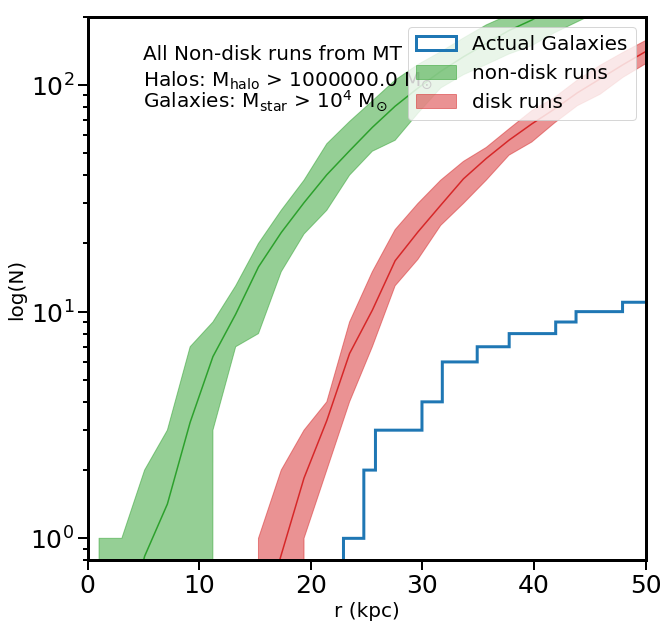

h1107
250.1792327062657
(49,)
h1245
236.2761072433713
(2, 49)
h1386
228.8905347355947
(3, 49)
h493
329.7126351651607
(4, 49)
h539
317.335209598578
(5, 49)
h609
306.53829062361126
(6, 49)
h694
291.8145459931862
(7, 49)
h795
278.0462153754999
(8, 49)
h833
270.86653829062357
(9, 49)
h848
271.3420234039401
(10, 49)
h879
265.48659457858093
(11, 49)
h988
259.0505110354021
(12, 49)


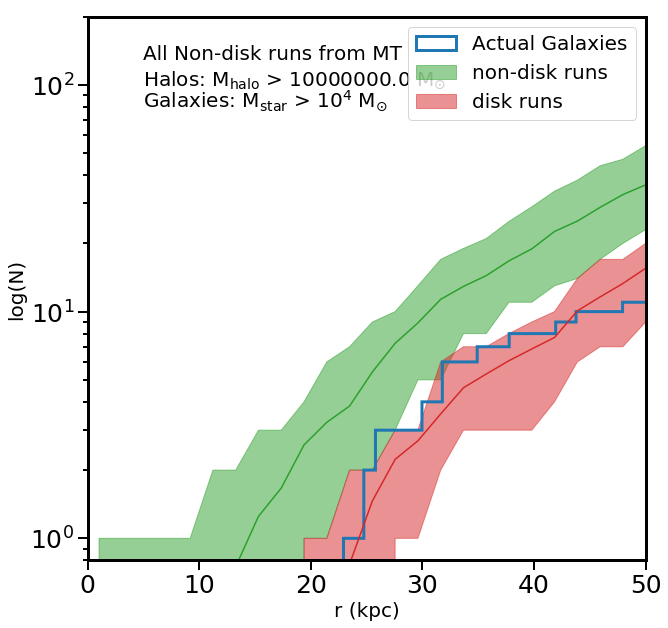

h1107
250.1792327062657
(49,)
h1245
236.2761072433713
(2, 49)
h1386
228.8905347355947
(3, 49)
h493
329.7126351651607
(4, 49)
h539
317.335209598578
(5, 49)
h609
306.53829062361126
(6, 49)
h694
291.8145459931862
(7, 49)
h795
278.0462153754999
(8, 49)
h833
270.86653829062357
(9, 49)
h848
271.3420234039401
(10, 49)
h879
265.48659457858093
(11, 49)
h988
259.0505110354021
(12, 49)


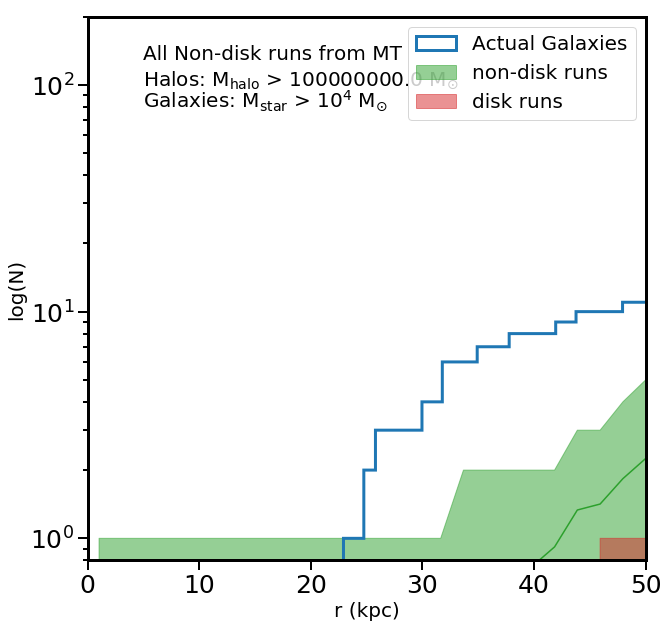

In [24]:
Mass_list = [1.0e6,1.0e7,1.0e8]

#Cut on Mass
for M_t in Mass_list:
    h = 0.6751

    total_len = 0
    total_hist = None

    disk_total_len = 0
    disk_total_hist = None

    radius_bins = np.linspace(0.0,100.0,50)

    for data_file in os.listdir('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'):
        h_number = data_file.split('_')[2]
        print h_number
        f_halos = np.loadtxt('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'+data_file)
        Data_Vmax = f_halos[:,3]
        Data_X = f_halos[:,0]*1000.0/h
        Data_Y = f_halos[:,1]*1000.0/h
        Data_Z = f_halos[:,2]*1000.0/h
        Data_Rvir = f_halos[:,5]/h
        Data_M = f_halos[:,4]/h
        Data_Vpeak = f_halos[:,6]

        Vmax_mask = (Data_M>M_t)

        Data_X_cut = Data_X[Vmax_mask]
        Data_Y_cut = Data_Y[Vmax_mask]
        Data_Z_cut = Data_Z[Vmax_mask]
        Data_M_cut = Data_M[Vmax_mask]
        Data_Rvir_cut = Data_Rvir[Vmax_mask]

        host_index = np.argmax(Data_M_cut)
        R_vir_host = Data_Rvir_cut[host_index]
        print R_vir_host
        cen_host = [Data_X_cut[host_index],Data_Y_cut[host_index],Data_Z_cut[host_index]]

        dist = np.sqrt((Data_X_cut-cen_host[0])**2.0+(Data_Y_cut-cen_host[1])**2.0+(Data_Z_cut-cen_host[2])**2.0)

        hist_matrix_diff, bins = np.histogram(dist[(dist!=0.0)],bins=radius_bins)
        hist_matrix = np.cumsum(hist_matrix_diff)

        #print hist_matrix, radius_bins

        #print total_hist.shape
        if hasattr(total_hist, '__len__'):
            total_hist = np.vstack((total_hist,hist_matrix))
        else:
            total_hist = hist_matrix
        print total_hist.shape

        #if total_hist == None:
        #    total_hist = hist_matrix
        #else:
        #    total_hist = np.concatenate((total_hist,hist_matrix),axis=0)

        total_len += len(hist_matrix)

    plot_bins = [(radius_bins[ii]+radius_bins[ii+1])/2.0 for ii in range(len(radius_bins)-1)]

    min_line = [np.min(total_hist[:,ii]) for ii in range(len(total_hist[0]))]
    max_line = [np.max(total_hist[:,ii]) for ii in range(len(total_hist[0]))]
    med_line = [np.mean(total_hist[:,ii]) for ii in range(len(total_hist[0]))]

    hl_line = [high_low_limit(total_hist[:,ii],0.68) for ii in range(len(total_hist[0]))]

    low_line = [xx[0] for xx in hl_line]
    high_line = [xx[1] for xx in hl_line]

    plot_top = max_line[-1]

    # Now do the same for the disk runs

    for data_file in os.listdir('../../initial_test_with_ELVIS/Tyler_disk_data_from_mt/'):
        h_number = data_file.split('_')[2]
        f_halos = np.loadtxt('../../initial_test_with_ELVIS/Tyler_disk_data_from_mt/'+data_file)
        Data_Vmax = f_halos[:,3]
        Data_X = f_halos[:,0]*1000.0/h
        Data_Y = f_halos[:,1]*1000.0/h
        Data_Z = f_halos[:,2]*1000.0/h
        Data_Rvir = f_halos[:,5]/h
        Data_M = f_halos[:,4]/h
        Data_Vpeak = f_halos[:,6]

        Vmax_mask = (Data_M>M_t)

        Data_X_cut = Data_X[Vmax_mask]
        Data_Y_cut = Data_Y[Vmax_mask]
        Data_Z_cut = Data_Z[Vmax_mask]
        Data_M_cut = Data_M[Vmax_mask]
        Data_Rvir_cut = Data_Rvir[Vmax_mask]

        host_index = np.argmax(Data_M_cut)
        R_vir_host = Data_Rvir_cut[host_index]
        cen_host = [Data_X_cut[host_index],Data_Y_cut[host_index],Data_Z_cut[host_index]]

        dist = np.sqrt((Data_X_cut-cen_host[0])**2.0+(Data_Y_cut-cen_host[1])**2.0+(Data_Z_cut-cen_host[2])**2.0)

        hist_matrix_diff, bins = np.histogram(dist[(dist!=0.0)],bins=radius_bins)
        hist_matrix = np.cumsum(hist_matrix_diff)
        if hasattr(disk_total_hist, '__len__'):
            disk_total_hist = np.vstack((disk_total_hist,hist_matrix))
        else:
            disk_total_hist = hist_matrix

        #if disk_total_hist == None:
        #    disk_total_hist = hist_matrix
        #else:
        #    disk_total_hist = np.concatenate((disk_total_hist,hist_matrix),axis=0)

        disk_total_len += len(hist_matrix)

    disk_min_line = [np.min(disk_total_hist[:,ii]) for ii in range(len(disk_total_hist[0]))]
    disk_max_line = [np.max(disk_total_hist[:,ii]) for ii in range(len(disk_total_hist[0]))]
    disk_med_line = [np.mean(disk_total_hist[:,ii]) for ii in range(len(disk_total_hist[0]))]

    disk_hl_line = [high_low_limit(disk_total_hist[:,ii],0.68) for ii in range(len(disk_total_hist[0]))]

    disk_low_line = [xx[0] for xx in disk_hl_line]
    disk_high_line = [xx[1] for xx in disk_hl_line]


    f_dat = np.loadtxt('../../Sats_data.csv',delimiter=',',dtype=object)
    gal_dist = np.asarray([float(xx) for xx in f_dat[:,1]])
    gal_mass = np.asarray([float(xx) for xx in f_dat[:,2]])

    large_gal_mask = (gal_mass>1.0e4)&(gal_dist<R_vir_host)

    large_gal_dist = gal_dist[large_gal_mask]
    #print large_gal_dist

    plt.figure(1,(10,10))
    rc('axes',linewidth=3)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.tick_params(which='minor',width=2,length=5)
    plt.tick_params(which='major',width=2,length=10)
    plt.xlim([0.0,50.0])
    plt.ylim([0.8,200.0])
    plt.xlabel('r (kpc)',fontsize=20)
    plt.ylabel('log(N)',fontsize=20)
    plt.yscale('log')

    plt.text(5.0,130.0,'All Non-disk runs from MT',fontsize=20)
    plt.text(5.0,100.0,'Halos: $M_{halo}$ > '+str(M_t)+' $M_{\odot}$',fontsize=20)
    plt.text(5.0,80.0,'Galaxies: $M_{star}$ > $10^4$ $M_{\odot}$',fontsize=20)

    plot_bins = [(radius_bins[ii]+radius_bins[ii+1])/2.0 for ii in range(len(radius_bins)-1)]

    plt.hist(gal_dist,bins=np.linspace(0.0,R_vir_host,1000),cumulative=True,histtype='step',linewidth=3,label='Actual Galaxies')

    plt.fill_between(plot_bins,low_line,high_line,color='C2',alpha=0.5,label='non-disk runs')
    plt.plot(plot_bins,med_line,color='C2')

    plt.fill_between(plot_bins,disk_low_line,disk_high_line,color='C3',alpha=0.5,label='disk runs')
    plt.plot(plot_bins,disk_med_line,color='C3')

    #plt.yscale('log')
    plt.legend(loc=1, prop={'size': 20})
    #plt.savefig('./plots_for_defense/radial_projections_from_mt.png',bbox_inches='tight')
    plt.show()

In [59]:
print plot_bins
print low_line

print dist

[1.0204081632653061, 3.0612244897959187, 5.1020408163265305, 7.142857142857143, 9.183673469387756, 11.224489795918368, 13.26530612244898, 15.306122448979593, 17.346938775510203, 19.387755102040817, 21.42857142857143, 23.46938775510204, 25.510204081632654, 27.551020408163268, 29.591836734693878, 31.632653061224488, 33.673469387755105, 35.714285714285715, 37.755102040816325, 39.79591836734694, 41.83673469387755, 43.87755102040816, 45.91836734693878, 47.95918367346939, 50.0, 52.04081632653062, 54.08163265306122, 56.12244897959184, 58.163265306122454, 60.20408163265306, 62.244897959183675, 64.28571428571429, 66.32653061224491, 68.36734693877551, 70.40816326530611, 72.44897959183675, 74.48979591836735, 76.53061224489795, 78.57142857142858, 80.61224489795919, 82.65306122448979, 84.69387755102042, 86.73469387755102, 88.77551020408163, 90.81632653061226, 92.85714285714286, 94.89795918367346, 96.9387755102041, 98.9795918367347]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

h1107
h1245
h1386
h493
h539
h609
h694
h795
h833
h848
h879
h988


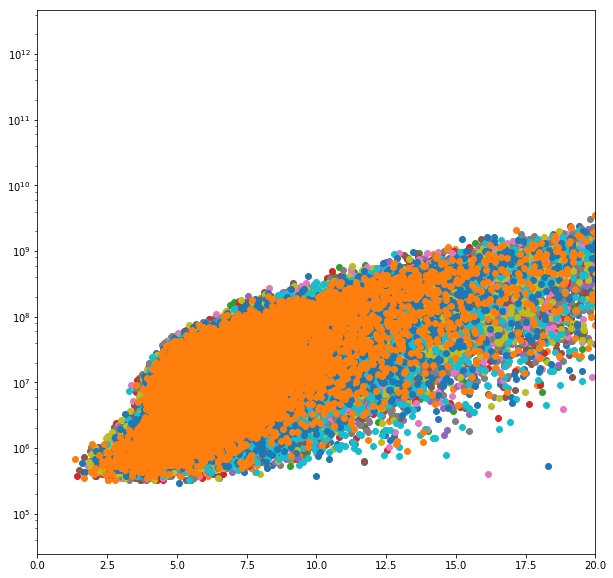

In [6]:

h = 0.6751

total_len = 0
total_hist = None

disk_total_len = 0
disk_total_hist = None

radius_bins = np.linspace(0.0,100.0,50)

plt.figure(1,(10,10))

for data_file in os.listdir('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'):
    h_number = data_file.split('_')[2]
    print h_number
    f_halos = np.loadtxt('../../initial_test_with_ELVIS/Tyler_dmo_data_from_mt/'+data_file)
    Data_Vmax = f_halos[:,3]
    Data_X = f_halos[:,0]*1000.0/h
    Data_Y = f_halos[:,1]*1000.0/h
    Data_Z = f_halos[:,2]*1000.0/h
    Data_Rvir = f_halos[:,5]/h
    Data_M = f_halos[:,4]/h
    Data_Vpeak = f_halos[:,6]
    
    M_t = 1.0e10
    
    plt.scatter(Data_Vpeak,Data_M)

plt.yscale('log')
plt.xlim([0.0,20.0])
plt.show()